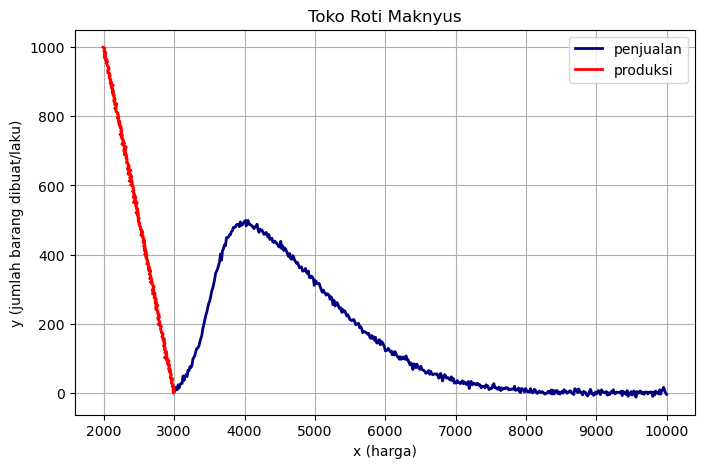

In [55]:
# Nama: Olivia Natasya Yuniar
# NPM: 24083010012

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

# range harga jual
x = np.linspace(3000, 10000, 500)

# rescale parameters
a = 6
loc = 3.5 * 1000     # shift loc
scale = 1.5 * 1000   # widen scale

# probability density, right tail skew
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000

np.random.seed(12) # masukkan NPM
y = y + np.random.normal(0, 0.005, size=x.shape)  # add Gaussian noise
y = y*1000

# harga produksi
produksi_y= np.linspace(0, 1000, len(x))
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape)*100
# linearly decreases from 3000 -> 2000 for quantity 0 -> 1000

# Plot
plt.figure(figsize=(8,5))
plt.plot(x, y, color="navy", label='penjualan', linewidth=2)
plt.plot(produksi_z, produksi_y, color="red", label='produksi', linewidth=2)
plt.title("Toko Roti Maknyus")
plt.xlabel("x (harga)")
plt.ylabel("y (jumlah barang dibuat/laku)")
plt.grid(True)
plt.legend()
plt.show()

Volume produksi optimal: 148 unit
Harga jual optimal: Rp4,038
Keuntungan maksimum: Rp1,589,873


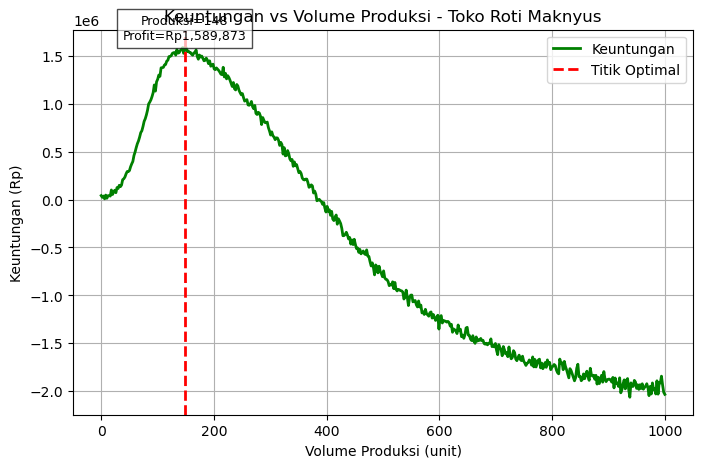

In [57]:
# Data Harga dan Permintaan (Penjualan)
x = np.linspace(3000, 10000, 500)   # range harga jual

# distribusi permintaan (skew normal)
a = 6
loc = 3.5 * 1000
scale = 1.5 * 1000
y = skewnorm.pdf(x, a=a, loc=loc, scale=scale) * 1000

# tambahkan variasi/noise
np.random.seed(12)
y = y + np.random.normal(0, 0.005, size=x.shape)
y = y * 1000

# Data Produksi (supply) 
produksi_y = np.linspace(0, 1000, len(x))  # jumlah produksi
produksi_z = np.linspace(3000, 2000, len(x)) + np.random.normal(0, 0.1, size=x.shape) * 100  # biaya per unit

# Hitung Pendapatan, Biaya, Keuntungan
pendapatan = x * y
biaya = produksi_z * produksi_y
keuntungan = pendapatan - biaya

# cari titik keuntungan maksimum
idx_max = np.argmax(keuntungan)
volume_opt = produksi_y[idx_max]
harga_opt = x[idx_max]
profit_max = keuntungan[idx_max]

print(f"Volume produksi optimal: {volume_opt:,.0f} unit")
print(f"Harga jual optimal: Rp{harga_opt:,.0f}")
print(f"Keuntungan maksimum: Rp{profit_max:,.0f}")

# Visualisasi Hasil
plt.figure(figsize=(8,5))

# kurva keuntungan
plt.plot(produksi_y, keuntungan, label="Keuntungan", color="green", linewidth=2)

# titik optimal
plt.axvline(volume_opt, color="red", linestyle="--", linewidth=2, label="Titik Optimal")
plt.text(volume_opt, profit_max*1.05, 
         f"Produksi={volume_opt:,.0f}\nProfit=Rp{profit_max:,.0f}", 
         ha="center", fontsize=9, bbox=dict(facecolor="white", alpha=0.7))

plt.title("Keuntungan vs Volume Produksi - Toko Roti Maknyus")
plt.xlabel("Volume Produksi (unit)")
plt.ylabel("Keuntungan (Rp)")
plt.grid(True)
plt.legend()
plt.show()